## 1) Clustering

Soient les données
$$\begin{pmatrix}
x & y\\
3 & 4\\
1 & 5\\
6 & 5\\
2 & 1\\
3 & 3\\
9 & 2\\
8 & 4\\
\end{pmatrix}$$
Appliquez l'algorithme des k-means pour $K=2$ d'abord avec ces centres :
$$\begin{pmatrix}
x & y\\
3 & 7\\
6 & 2
\end{pmatrix}$$
Puis ceux-ci :
$$\begin{pmatrix}
x & y\\
3 & 3\\
3 & 8
\end{pmatrix}$$
Comparez avec la partition obtenue via l'algorithme CAH (en utilisant complete linkage). Décrivez les étapes et donnez le dendrogramme final.

## 2) Chaînes de Markov

Un garagiste contrôle tous les mois l'état d'une pièce de moteur. Elle peut se trouver dans les états suivants : fonctionnelle (F), usée (U) ou défaillante (D).
On considère que la situation peut se modéliser avec une chaîne de Markov dont la matrice de transition est donnée dans l'ordre F, U, D par
$$T = \begin{pmatrix}
0.9 & 0.1 & 0.0\\
0.0 & 0.6 & 0.4\\
0.0 & 0.0 & 1.0
\end{pmatrix}$$

1) Expliquer les coefficients de la dernière ligne de la matrice T. Quels sont les états transients ? Absorbants ? (Justifier).
2) Dessiner le graphe correspondant à cette chaîne.
3) Au début des contrôles, la pièce vient d'être changée pour une pièce neuve.
Quelle est la probabilité pour qu'au bout de 6 mois la pièce soit défaillante ?
4) Au bout de combien de temps en moyenne une pièce neuve sera défaillante ?

## 3) k plus proches voisins : classification

Soient les données
$$\begin{pmatrix}
x & y & \mbox{classe}\\
4 & 4 & 2\\
6 & 8 & 1\\
7 & 1 & 2\\
7 & 7 & 1\\
6 & 2 & 2\\
5 & 2 & 2\\
2 & 6 & 2\\
9 & 7 & 1\\
4 & 8 & 1\\
6 & 4 & 1
\end{pmatrix}$$
Prenant $k=3$, considérez d'abord les 4 premières rangées comme l'ensemble de test, puis les 4 dernières. Dans les deux cas calculez le taux d'erreur.

## 4) Arbre de décision : classification

Soient les données
$$\begin{pmatrix}
x & y & z\mbox{ (cible)}\\
1 & A & 1\\
2 & A & 1\\
1 & B & 2\\
3 & B & 2\\
4 & C & 2\\
3 & C & 3\\
7 & C & 3\\
1 & B & 3\\
6 & A & 1
\end{pmatrix}$$
Les colonnes x et y sont respectivement numériques et symboliques. Il y a trois classes en sortie : colonne 'z'.

Construisez l'arbre de décision associé (avec le critère Gini).

<h2 style="color:red">Corrigé</h2>

## Clustering

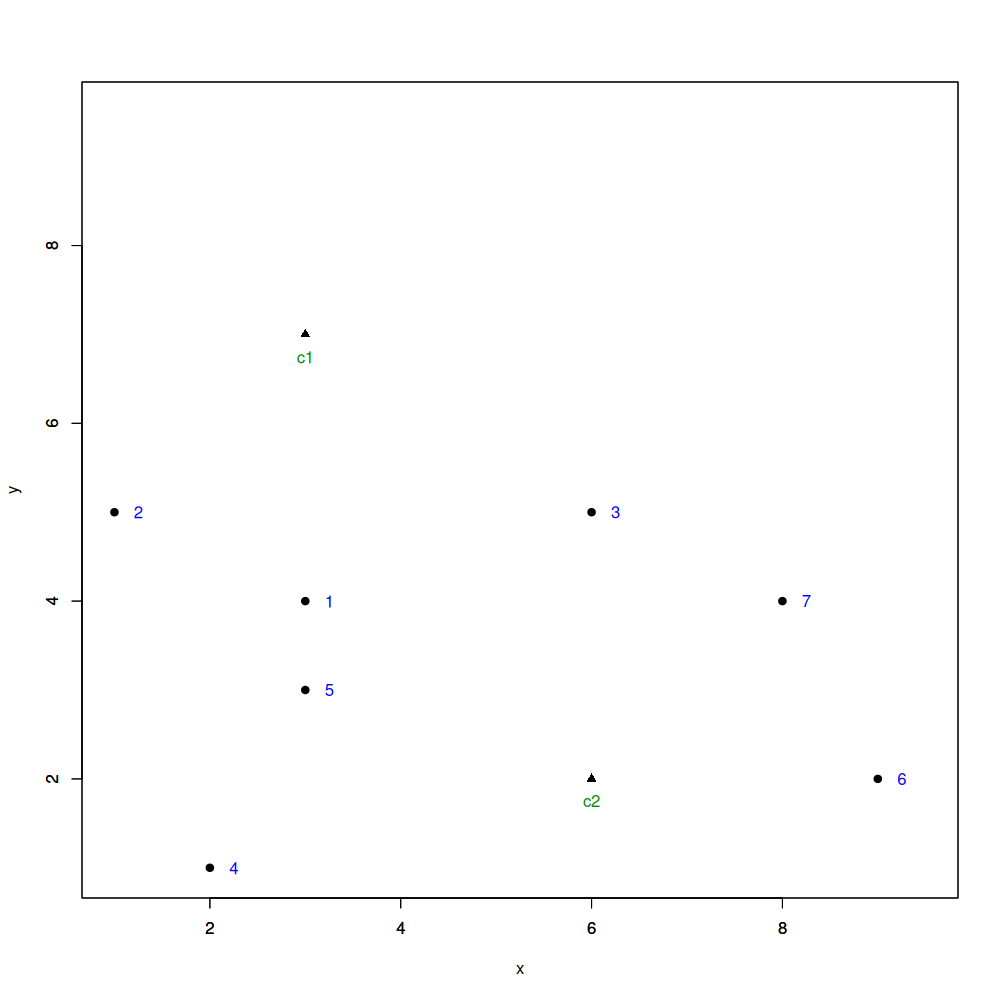

In [1]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 100)
data <- matrix(c(3,1,6,2,3,9,8, 4,5,5,1,3,2,4), ncol=2)
ctrs1 <- matrix(c(3,6, 7,2), ncol=2)
ctrs2 <- matrix(c(3,3, 3,8), ncol=2)
plotDataCtrs <- function(dat, ctrs=NULL, ...) {
    rg <- range(dat)
    if (!is.null(ctrs))
        rg <- range(rg, ctrs)
    rg[2] <- rg[2] + 0.5
    plot(dat, pch=19, xlab="x", ylab="y", xlim=rg, ylim=rg, ...)
    text(dat[,1] + 0.25, dat[,2], 1:nrow(dat), col="blue")
    if (!is.null(ctrs)) {
        par(new=TRUE)
        plot(ctrs, pch=17, xlab="", ylab="", xlim=rg, ylim=rg)
        text(ctrs[,1], ctrs[,2] - 0.25, c("c1", "c2"), col=colors()[258])
    }
}
plotDataCtrs(data, ctrs1)

On commence par remarquer (visuellement, sur le graphe) que les points 2 et (6, 7) sont respectivement plus proches de $c_1$ et $c_2$. Reste à calculer les distances des autres points aux deux centres pour être sûr :

In [2]:
colSums( (t(data[-c(2,6,7),]) - ctrs1[1,] )^2 )
colSums( (t(data[-c(2,6,7),]) - ctrs1[2,] )^2 )
# À la main : 3^2, 3^2 + 2^2 etc, calculs faciles

[1]  9 13 37 16

[1] 13  9 17 10

Ainsi 1 appartient au cluster 1, et (3, 4, 5) sont dans l'autre groupe. On recalcule les centres :

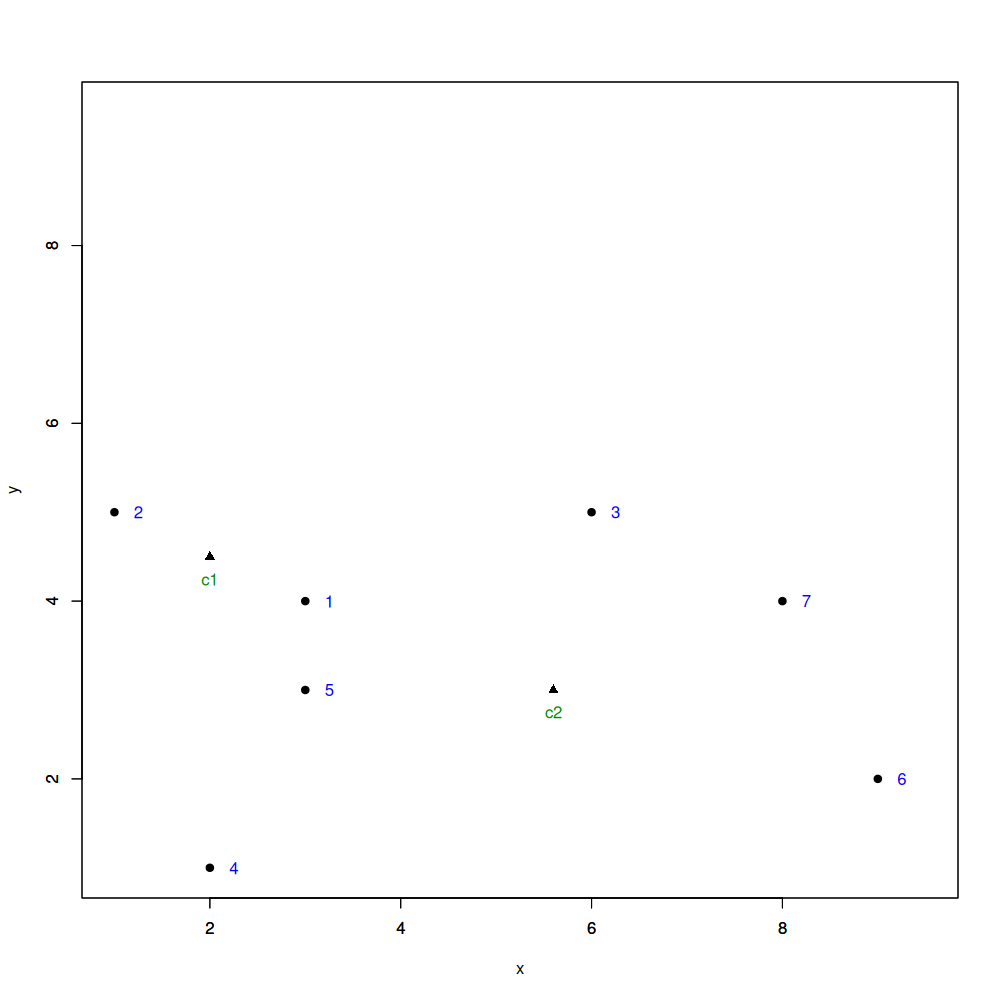

In [3]:
clust1 <- 1:2 ; clust2 <- 3:7
ctrs1 <- rbind( colMeans(data[clust1,]), colMeans(data[clust2,]) )
# À la main : (3+1)/2=2, (6+2+3+9+8)/5=5.6, (4+5)/2=4.5, (5+1+3+2+4)/5=3
plotDataCtrs(data, ctrs1)

Très clairement les points (1, 2, 5) sont plus proches de $c_1$, tandis que (3, 6, 7) sont plus proches de $c_2$. Calculons juste la distance du 4eme point à chacun des centres :

In [4]:
colSums( (t(ctrs1) - data[4,])^2 )
# À la main : (2 - 2)^2 + (1 - 4.5)^2 vs (2 - 5.6)^2 + (1 - 3)^2
# En fait (2 - 3.6)^2 est déjà plus grand que 3.5^2 donc on peut s'économiser le calcul.

[1] 12.25 16.96

Nous avons donc les nouveaux clusters suivants :

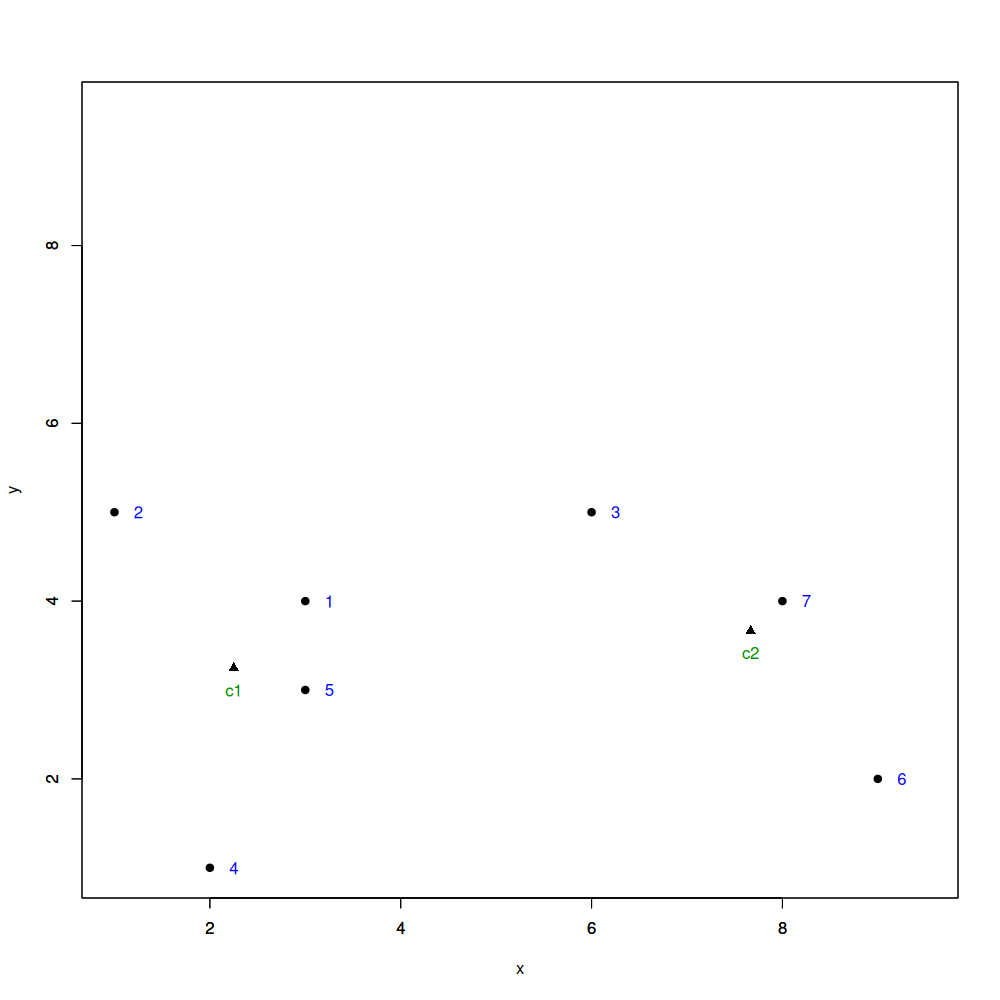

In [5]:
clust1 <- c(1, 2, 4, 5) ; clust2 <- c(3, 6, 7)
ctrs1 <- rbind( colMeans(data[clust1,]), colMeans(data[clust2,]) )
plotDataCtrs(data, ctrs1)

Les appartenances ne changent pas (évidence graphique), on a donc convergé.

On recommence avec les autres centres :

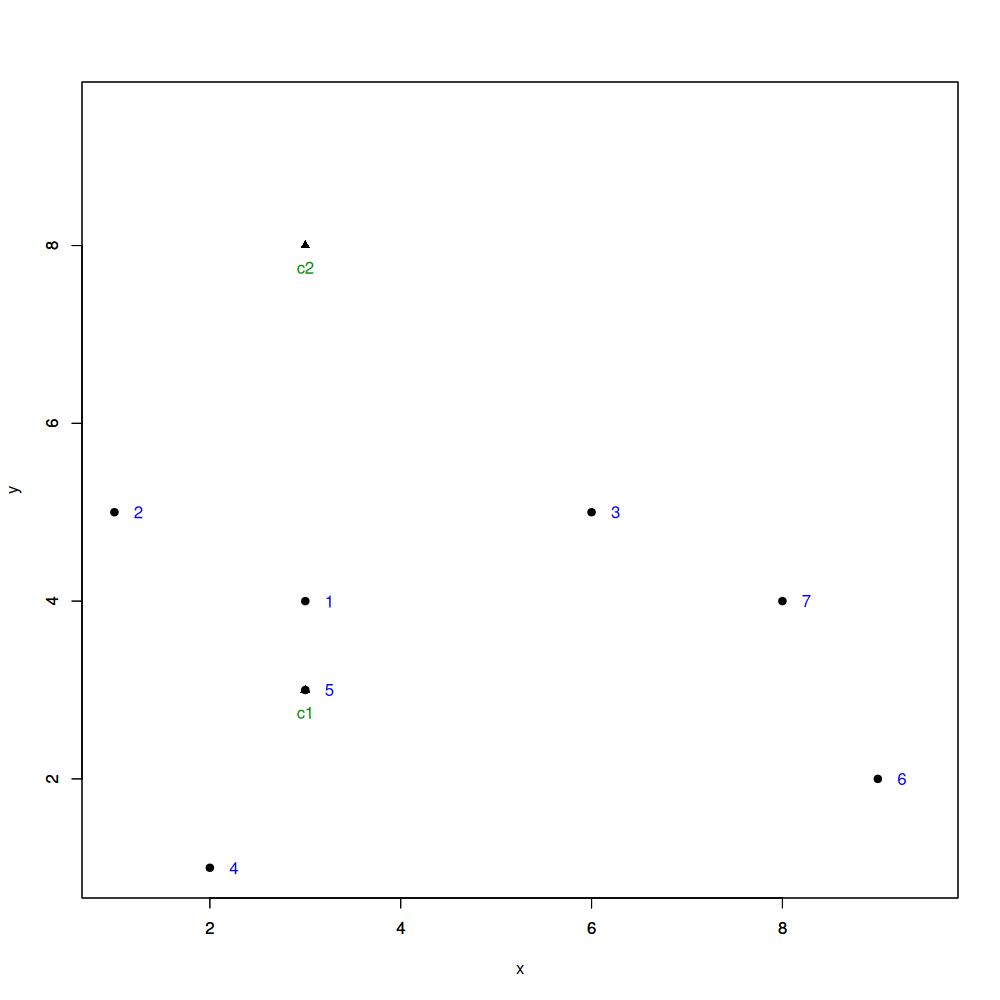

In [6]:
plotDataCtrs(data, ctrs2)

Les points (1, 4, 7, 8) sont clairement plus proches de $c_1$, ainsi que le point 5 puisqu'il est confondu avec un centre. Calculons les deux distances visuellement ambigues :

In [7]:
colSums( (t(data[c(2,3),]) - ctrs2[1,] )^2 )
colSums( (t(data[c(2,3),]) - ctrs2[2,] )^2 )

[1]  8 13

[1] 13 18

Les points 2 et 3 sont donc aussi dans le premier groupe : le second cluster est (pour l'instant au moins) vide. Recalculons les centres :

In [8]:
clust1 <- 1:7 ; clust2 <- c()

Que faire ? Ce n'est pas spécifié dans le cours, donc il fallait faire une hypothèse. Les deux plausibles sont 1) considérer que le second cluster a disparu (moyenne sur l'ensemble vide = "NA"), et 2) garder $c_2$ tel quel. Si vous êtes arrivés ici en ayant tout fait correctement, vous aurez le maximum de points à cet exercice. Ceux ayant fait des calculs supplémentaires (corrects !) correspondant à ce qui suit auront un bonus.

Dans le premier cas il n'y a plus rien à faire (pas de bonus). Au passage, c'est ce que fait la fonction kmeans du logiciel R. Dans le second :

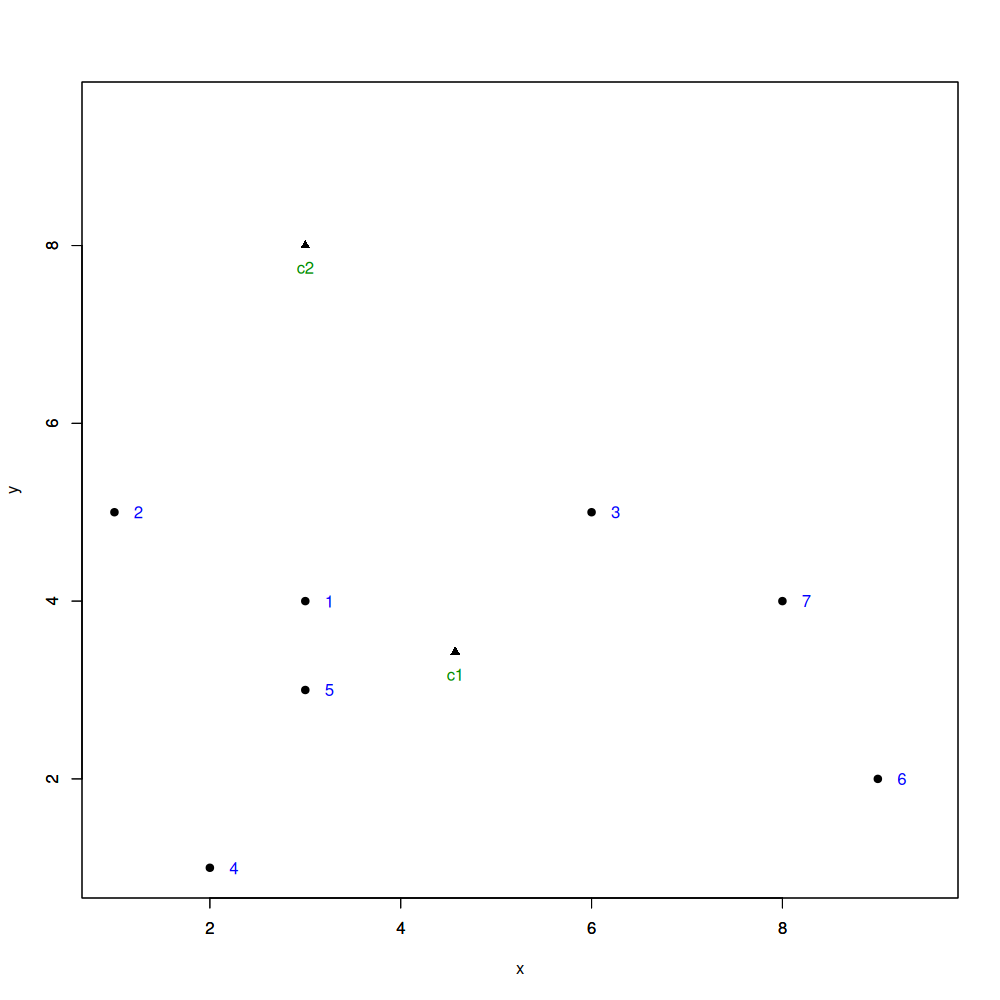

In [9]:
ctrs2 <- rbind(colMeans(data[clust1,]), ctrs2[,2]) #c2 ne change pas
plotDataCtrs(data, ctrs2)

In [10]:
colSums( (t(ctrs2) - data[2,])^2 ) #2 = seul point visuellement ambigu

[1] 15.22449 13.00000

Le point 2 rallie donc $c_2$. On itère :

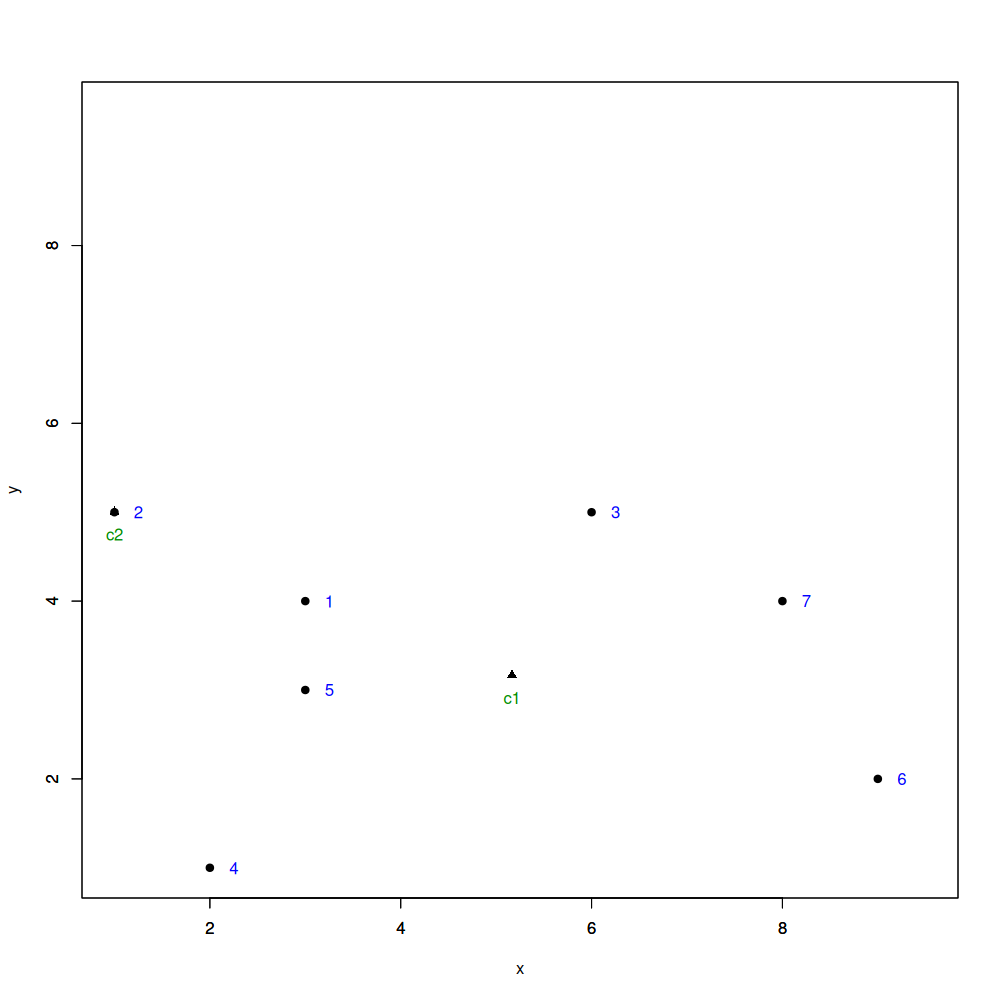

In [11]:
clust1 <- c(1, 3:7) ; clust2 <- 2
ctrs2 <- rbind( colMeans(data[clust1,]), data[clust2,] )
plotDataCtrs(data, ctrs2)

Ambiguités sur les points 1 et 4 :

In [12]:
colSums( (t(data[c(1,4),]) - ctrs2[1,] )^2 )
colSums( (t(data[c(1,4),]) - ctrs2[2,] )^2 )

[1]  5.388889 14.722222

[1]  5 17

1 rejoint donc le second cluster, 4 restant dans le 1er. Recalul :

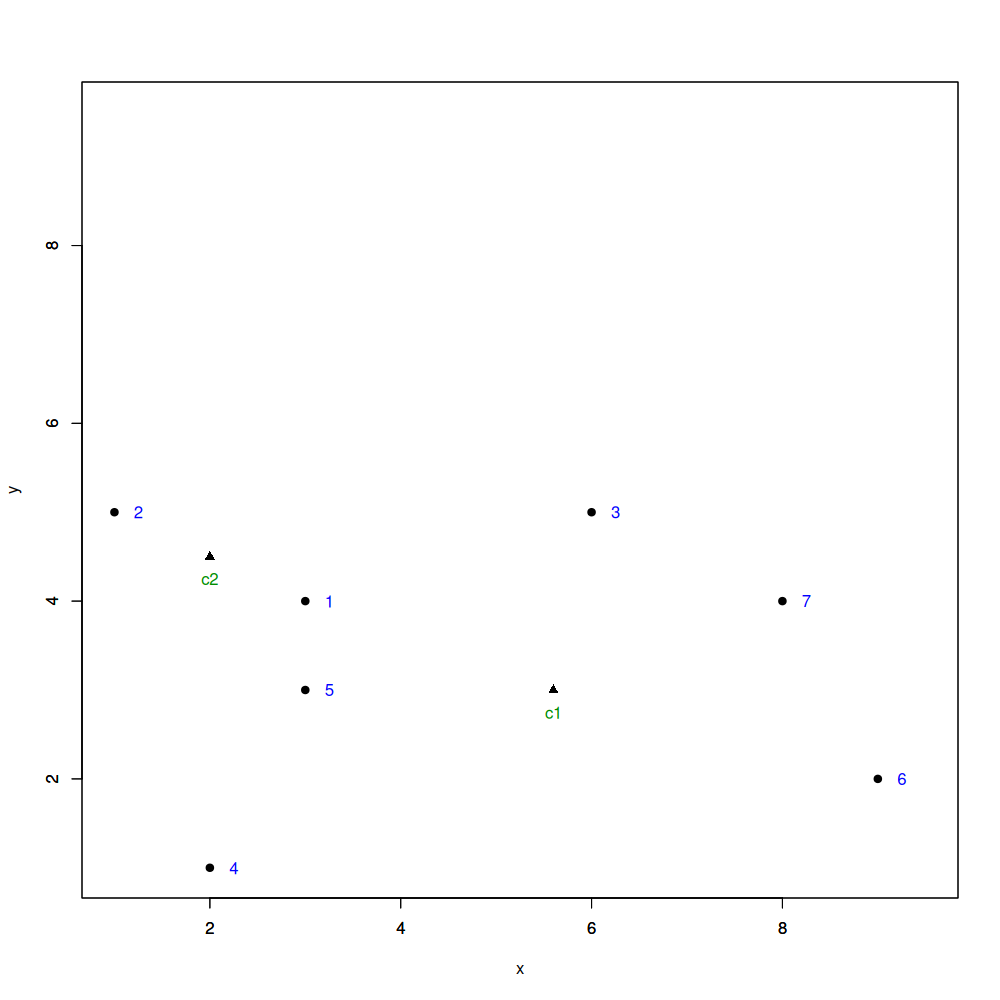

In [13]:
clust1 <- c(3:7) ; clust2 <- 1:2
ctrs2 <- rbind( colMeans(data[clust1,]), colMeans(data[clust2,]) )
plotDataCtrs(data, ctrs2)

(1, 2, 5) sont alors plus proches de $c_2$, tandis que (3, 6, 7) sont plus proches de $c_1$. Concernant le point 4 :

In [14]:
colSums( (t(ctrs2) - data[4,])^2 )

[1] 16.96 12.25

Nouveaux groupes : (3, 6, 7) et (1, 2, 4, 5). Comme avec le premier jeu de centres, en permutant les deux groupes (ce qui revient au même : l'ordre n'a pas d'importance). On s'arrête donc ici car on a déjà effectué ces calculs : l'algorithme a convergé.

In [15]:
# Note : pour vérifier avec R
#k <- kmeans(data, centers=ctrs1, algorithm="Lloyd") #ou ctrs2

### CAH

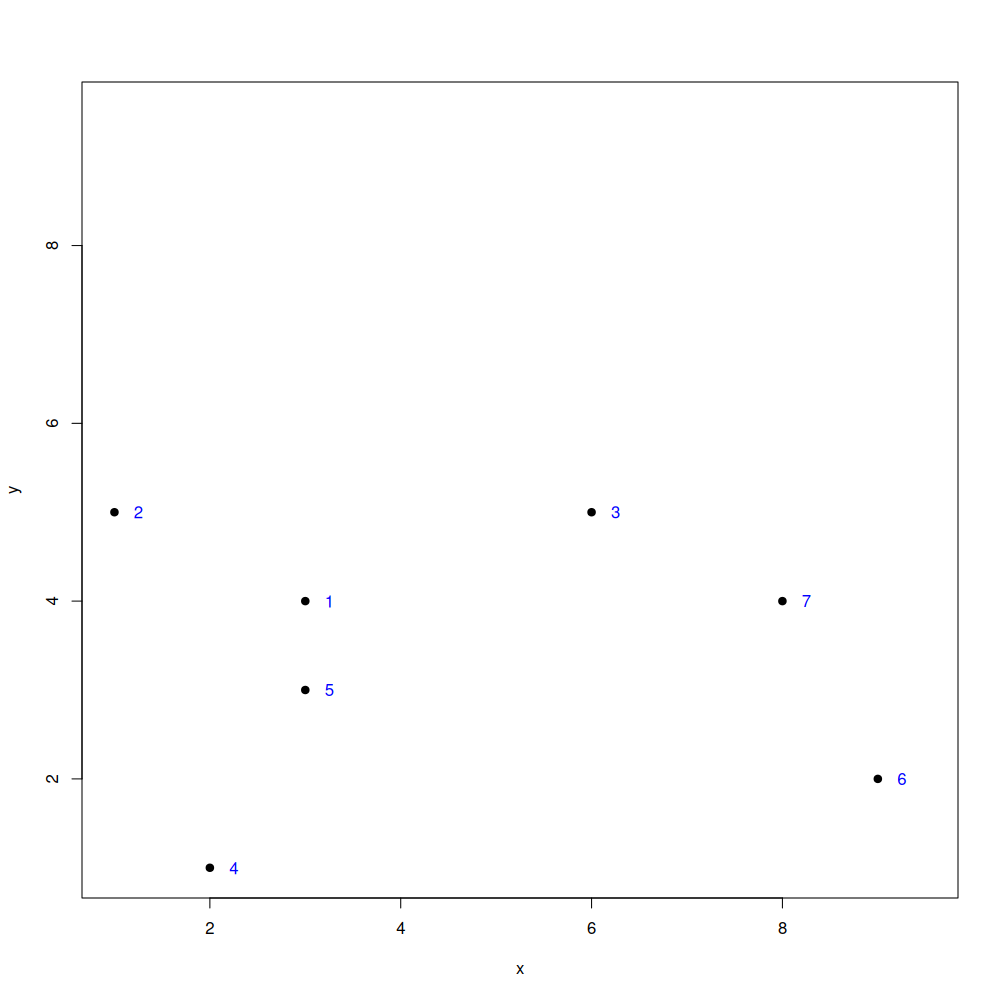

In [16]:
plotDataCtrs(data)

Pas besoin de calculs pour voir que l'on fusionnera d'abord 1 avec 5 (coût 1). On calcule alors la matrice des distances :

In [17]:
D <- as.matrix(dist(data[c(2:4, 6:7),])^2)
for (i in 2:5) { for (j in 1:(i-1)) { D[i,j] <- NA }}
D <- rbind(c(0, 8, 13, 10, 40, 26), cbind(rep(NA, 5), D))
rownames(D) <- colnames(D) <- c("1-5", 2:4, 6:7)
D

1-5 2  3  4  6  7 
1-5  0   8 13 10 40 26
2   NA   0 25 17 73 50
3   NA  NA  0 32 18  5
4   NA  NA NA  0 50 45
6   NA  NA NA NA  0  5
7   NA  NA NA NA NA  0

On doit faire un choix ensuite : 3 avec 7, ou bien 6 avec 7. Prenons 6-7 (coût $\sqrt{5} \simeq 2.2$), et fusionnons :

In [18]:
# Mise à jour des distances en prenant toujours le max (complete linkage)
D[1:4, 5] <- sapply(1:4, function(i) max(D[i,5], D[i,6]))
rownames(D)[5] <- colnames(D)[5] <- "6-7"
D <- D[1:5, 1:5]
D

1-5 2  3  4  6-7
1-5  0   8 13 10 40 
2   NA   0 25 17 73 
3   NA  NA  0 32 18 
4   NA  NA NA  0 50 
6-7 NA  NA NA NA  0

On fusionne donc ensuite 1-5 avec 2 (coût $\sqrt{8} \simeq 2.8$) :

In [19]:
D[2, 3:5] <- sapply(3:5, function(i) max(D[1,i], D[2,i]))
rownames(D)[2] <- colnames(D)[2] <- "1-2-5"
D <- D[2:5, 2:5]
D

1-2-5 3  4  6-7
1-2-5  0    25 17 73 
3     NA     0 32 18 
4     NA    NA  0 50 
6-7   NA    NA NA  0

Prochaine fusion : 1-2-5 avec 4 (coût $\sqrt{17} \simeq 4.1$). À ce stade j'écris la matrice manuellement :

In [20]:
D <- matrix(c(0,32,73, NA,0,18, NA,NA,0), byrow=TRUE, ncol=3)
rownames(D) <- colnames(D) <- c("1-2-4-5", "3", "6-7")
D

1-2-4-5 3  6-7
1-2-4-5  0      32 73 
3       NA       0 18 
6-7     NA      NA  0

Dernières fusions : 3 avec 6-7 (coût $\sqrt{18} \simeq 4.2$), puis 1-2-4-5 avec 3-6-7 (même clusters qu'avec le k-means, coût $\sqrt{73} \simeq 8.5$). L'utilisation de la racine carrée pour les coûts permet de dessiner un dendrogramme à l'échelle pas trop écrasé ; je compte bon évidemment si vous graduez selon les carrés (même si ce n'est alors pas à l'échelle). Je ne le dessine pas ici, mais regardons ce que R produit :

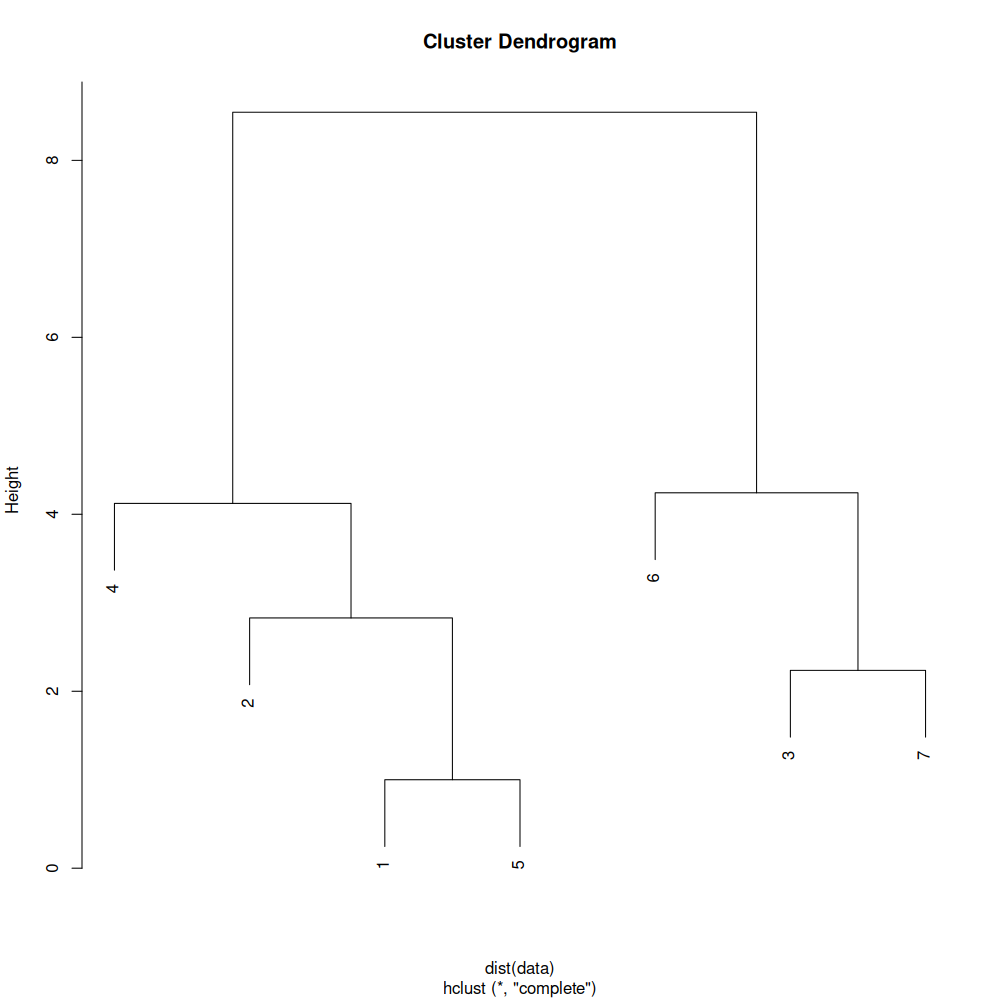

In [21]:
h <- hclust(dist(data))
plot(h)

C'est l'alternative en fusionnant d'abord 3 avec 7 - et exactement ce que l'on vient de calculer en intervertissant 3 et 6.

## Markov

1] Une pièce défectueuse ne peut pas se réparer toute seule par magie. Elle reste donc dans cet état, d'où la probabilité de 1 de passer de l'état D à D (et 0 vers les autres). Cet état est donc absorbant. Les deux autres états sont transients car la probabilité d'arriver dans l'état D est non nulle (cf. cours, exercices et remarque sur Discord).

Package:  markovchain
Version:  0.9.5
Date:     2023-09-24 09:20:02 UTC
BugReport: https://github.com/spedygiorgio/markovchain/issues




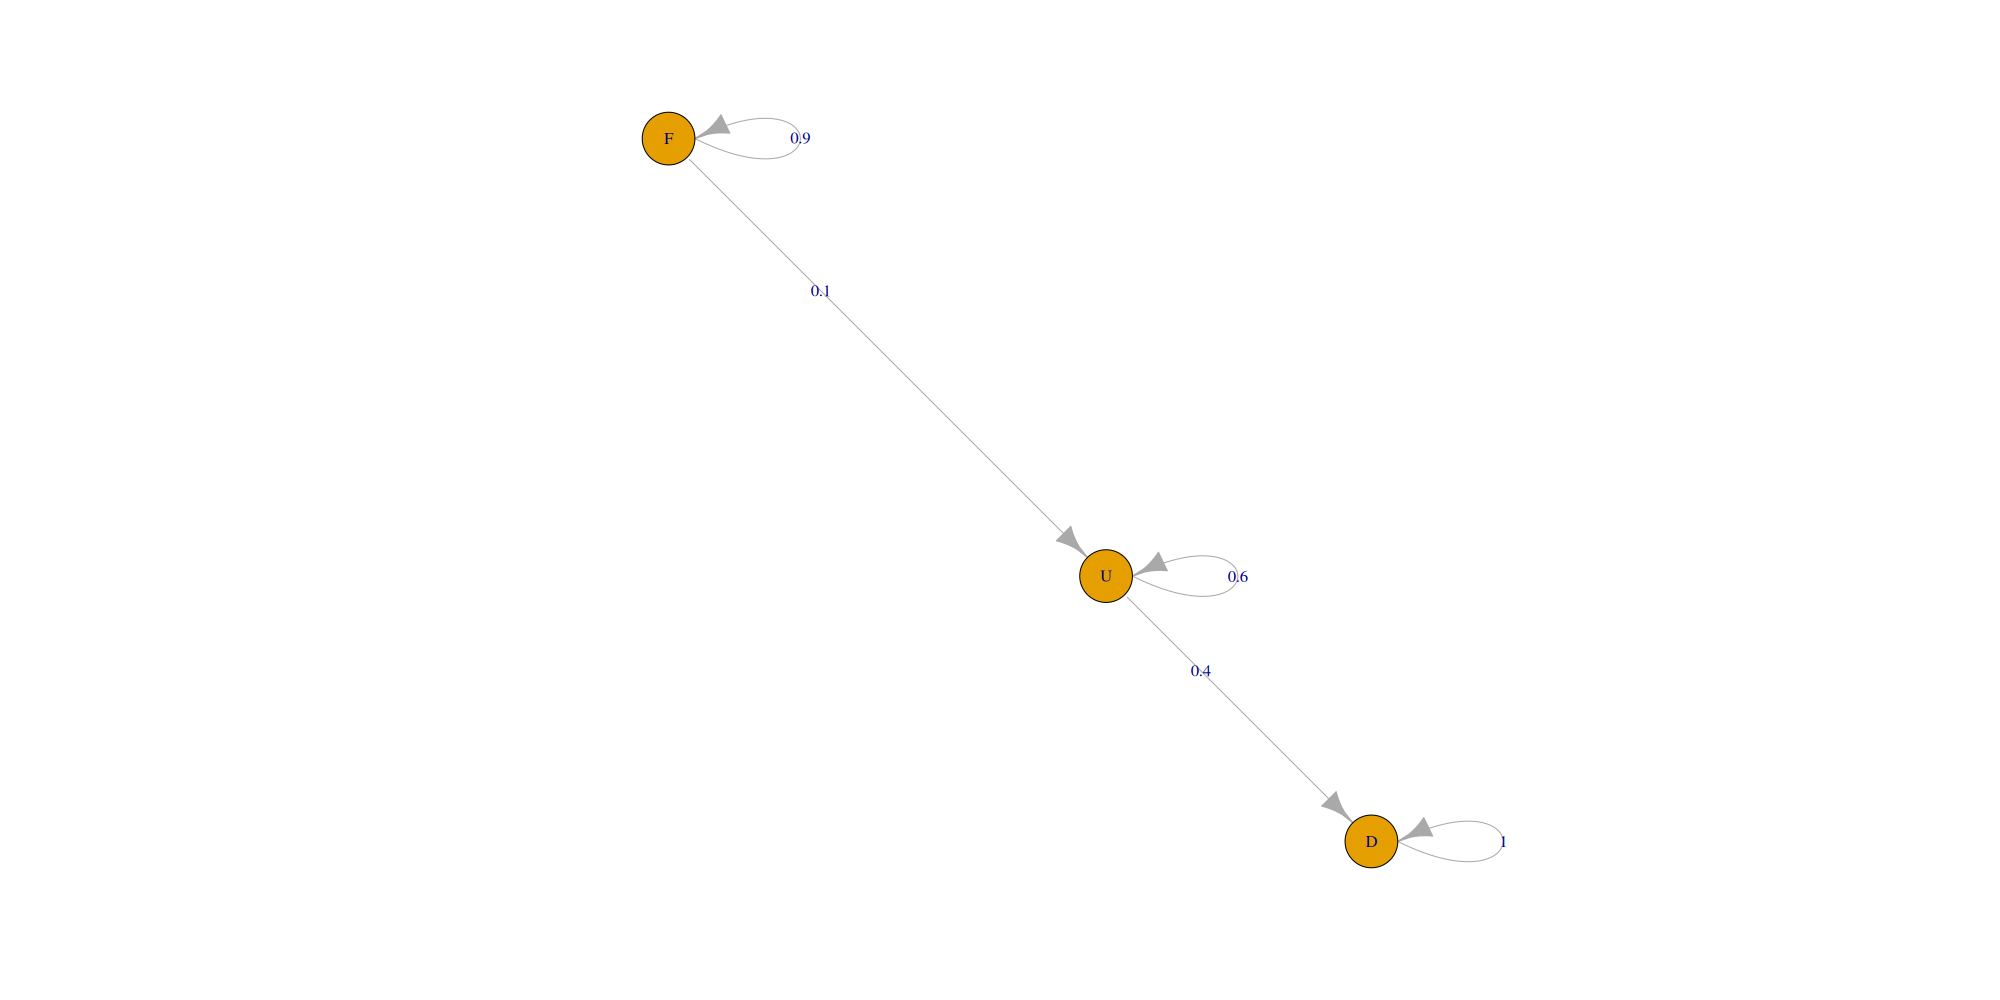

In [22]:
# 2]
options(repr.plot.width = 20, repr.plot.height = 10, repr.plot.res = 100)
library(markovchain)
mc <- new("markovchain", states = c("F", "U", "D"),
          transitionMatrix = matrix(c(0.9,0,0, 0.1,0.6,0, 0,0.4,1), nrow=3), name="test")
plot(mc, cex.lab=2)
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 100)

3] Il faut calculer $P^6$ et regarder le coefficient à la 1ere ligne (partant de l'état 'F') 3eme colonne (arrivant à l'état 'D'). On remarque que la matrice étant triangulaire les éléments sous-diagonaux restent nuls, et les éléments diagonaux de $P^6$ sont simplement les valeurs sur la diagonale élevées à la puissance 6. Reste les trois coefficients sur-diagonaux, mais je ne vois pas de façon simple de poursuivre. Vous aurez tous les points en arrêtant là.

On passe donc à l'option calculatrice : petit bonus si le calcul est fait et juste. Enfin, on peut diagonaliser la matrice pour calculer les puissances (presque) à la main : résoudre $P X = \lambda X$ pour $\lambda \in \{0.9, 0.6, 1\}$, puis écrire $P = V D V^{-1}$ où $V$ est la matrice des vecteurs propres normalisés en colonnes. Pour $\lambda = 0.9$ on trouve $x_2 = x_3 = 0$. Pour $\lambda = 0.6$ on trouve $x_3 = 0$ et $3 x_1 = - x_2$. Pour $\lambda = 1$ on peut arbitrairement choisir $x_3 = 1$ (avant normalisation). Tout cela mène à
$$V = 
\begin{pmatrix}
1 & \frac{1}{\sqrt{10}} & \frac{1}{\sqrt{3}}\\
0 & \frac{-3}{\sqrt{10}} & \frac{1}{\sqrt{3}}\\
0 & 0 & \frac{1}{\sqrt{3}}
\end{pmatrix}$$
Et ensuite $P^6 = V D^6 V^{-1}$. L'inversion de la matrice $3 \times 3$ se fait bien (structure triangulaire), mais il faut a priori la calculatrice pour les éléments diagonaux puissance 6. Je ne m'attendais de toutes façons pas à cette méthode - mais j'accorderai un bonus bien sûr si vous l'avez utilisée.

Bref, on trouve environ $0.3$ comme probabilité de transition F vers D en exactement 6 étapes (6 mois).

4] Cf. slides du cours, on écrit
$$N =
\begin{pmatrix}
0.1 & -0.1\\
0 & 0.4
\end{pmatrix}^{-1} = 
\begin{pmatrix}
10 & 2.5\\
0 & 2.5
\end{pmatrix}
$$
D'où la réponse : somme des éléments de la 1ère ligne de $N$ (pièce neuve) = $12.5$, douze mois et demi en moyenne, disons environ un an.

## k-PPV

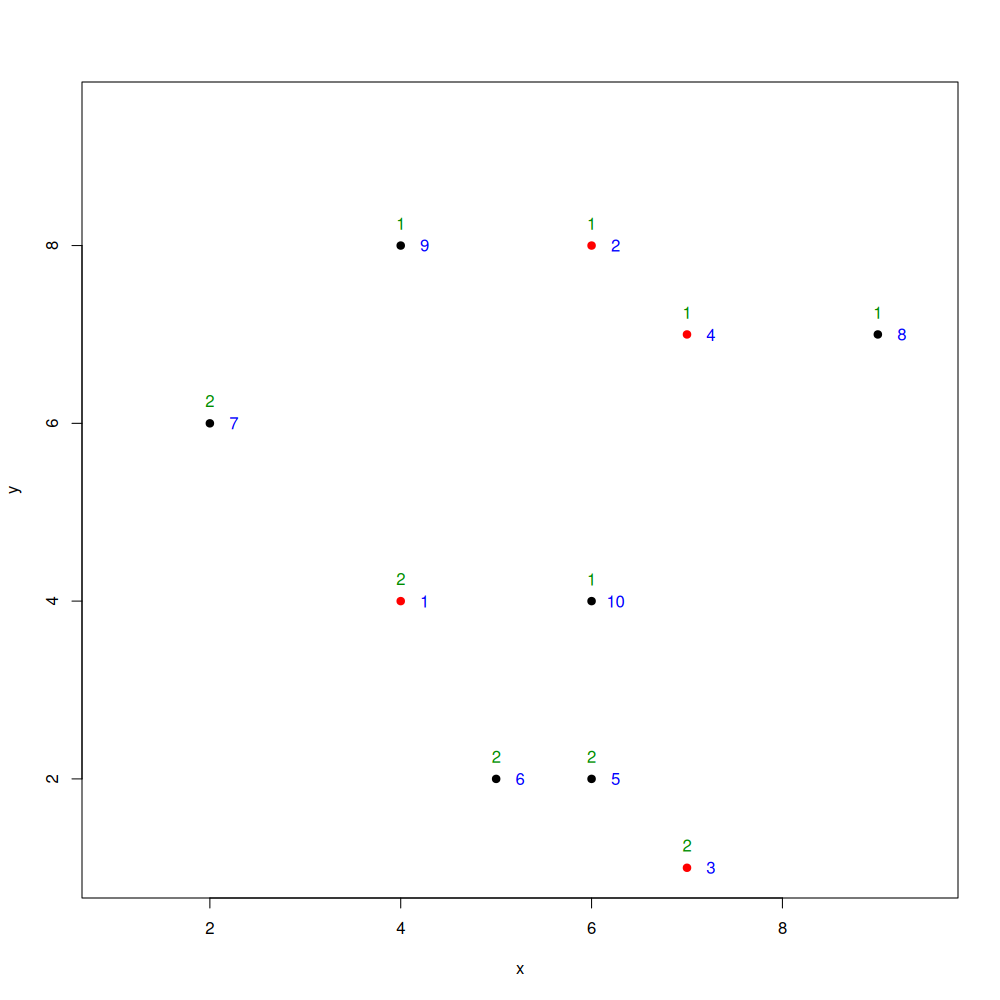

In [23]:
data <- matrix(c(4,6,7,7,6,5,2,9,4,6, 4,8,1,7,2,2,6,7,8,4, 2,1,2,1,2,2,2,1,1,1), ncol=3)
plotDataCtrs(data, col=c(rep("red", 4), rep("black", 6)))
text(data[,1], data[,2] + 0.25, data[,3], col=colors()[258])

1 a pour voisins immédiats 6 et 10 de classes 1 et 2. On a donc besoin du 3eme voisin : visuellement 5 ou 7. Dans les deux cas le label est 2, donc on prédit 2, la bonne classe : pas d'erreur.

2 a pour voisins immédiats 8 et 9 de classe 1, on prédit donc 1, pas d'erreur.

3 a pour voisins 5, 6 et 10 : majorité de 2, pas d'erreurs.

4 a pour voisins 8, 9 et 10 tous de classe 1 : on prédit 1, pas d'erreur. Taux = 0/4 = 0.

Ensuite :

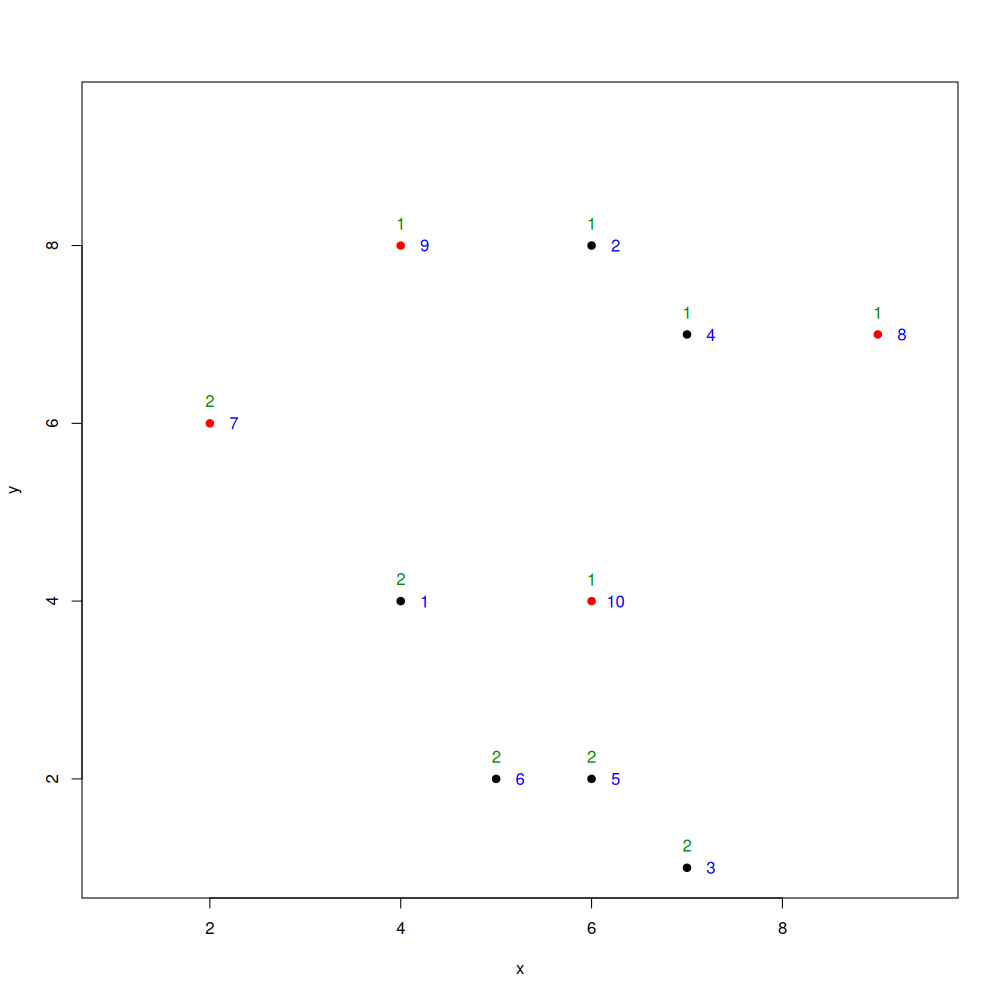

In [24]:
plotDataCtrs(data, col=c(rep("black", 6), rep("red", 4)))
text(data[,1], data[,2] + 0.25, data[,3], col=colors()[258])

7 a pour voisins 1 puis 2 ou 6. On calcule la distance (euclidienne au carré) de 7 à 2 : $4^2 + 2^2 = 20$, puis de 7 à 6 : $3^2 + 4^2 = 25$. Les deux plus proches voisins étant de classes 1 et 2, on doit chercher le voisin suivant : distance de 7 à 4 = 26, donc le 3eme voisin est 6 de classe 2 : pas d'erreur.

8 a pour voisins immédiats 2 et 4 de classe 1 : prédiction = "1", pas d'erreur.

9 a les mêmes premiers voisins que 8 : on prédit 1, pas d'erreur.

10 a pour voisins 1, 5, 6 tous de classe 2 : on prédit 2, faisant ainsi (enfin !) une erreur. Taux = 1/4 = 0.25.

## Arbres

Commençons par l'attribut $y$ : le découpage "A vs. le reste" est le seul menant à un noeud pur, donc intuitivement le meilleur découpage. Vérifions par le calcul : $(3/9) \times 1 + (6/9) \times 1/2 = 2/3 > (3/9) \times 5/9 + (6/9) \times 7/18 = 8/18$.

Comparons avec la colonne "x" : le tri donne
$$\begin{pmatrix}
x & y & z\mbox{ (cible)}\\
1 & A & 1\\
1 & B & 2\\
1 & B & 3\\
2 & A & 1\\
3 & B & 2\\
3 & C & 3\\
4 & C & 2\\
6 & A & 1\\
7 & C & 3
\end{pmatrix}$$

Découpe entre 1 et 2 (très hétérogène, le gain devrait être faible) : $(3/9) \times 1/3 + (6/9) \times 1/3 = 1/3$.

Entre 2 et 3 : $(4/9) \times 6/16 + (5/9) \times 9/25 = 1/6 + 1/5 = 11/30$

Entre 3 et 4 : même répartition que pour la découpe entre 1 et 2 donc même (faible) gain.

Entre 4 et 6 : $(2/9) \times 1/2 + (7/9) \times 17/49 = 7/63 + 17/63 = 24/63 < 2/3$

Entre 6 et 7 : $(1/9) \times 1 + (8/9) \times 22/64 = 8/72 + 22/72 = 30/72 < 2/3$

Conclusion : meilleur premier découpage selon $y$, "A vs. autre chose". Comme le noeud "$y = A$" est pur (feuille), on continue dans le sous arbre "$y \neq A$" seulement :
$$\begin{pmatrix}
x & y & z\mbox{ (cible)}\\
1 & B & 2\\
1 & B & 3\\
3 & B & 2\\
3 & C & 3\\
4 & C & 2\\
7 & C & 3
\end{pmatrix}$$

Les découpes "$y = B$" et "$y = C$" sont symétriques donc équivalentes, menant à un gain de $5/9$. Selon $x$ :

Découpe entre 1 et 3 : $(2/6) \times 1/2 + (4/6) \times 1/2 = 1/2 < 5/9$.

Entre 3 et 4 : pareil( symétrie), gain = $1/2$.

Entre 4 et 7 : $1/6 + (5/6) \times 13/25 = 9/15 > 5/9$

On retient donc ce dernier découpage : $x > 5.5$ ou non (menant encore à un noeud pur d'un côté). Reste :
$$\begin{pmatrix}
x & y & z\mbox{ (cible)}\\
1 & B & 2\\
1 & B & 3\\
3 & B & 2\\
3 & C & 3\\
4 & C & 2
\end{pmatrix}$$

Test découpe sur $y$ (une seule possible) : $(2/5) \times 1/2 + (3/5) \times 5/9 = 1/5 + 1/3 = 8/15$. Selon $x$ :

Entre 1 et 3 : même répartition que pour le calcul du gain sur $y$ donc on trouve $8/15$.

Entre 3 et 4 : $1/5 + (4/5) \times 1/2 = 6/10 > 8/15$.

On retient encore ce découpage "singleton" : $x > 3.5$ ou non. Reste :
$$\begin{pmatrix}
x & y & z\mbox{ (cible)}\\
1 & B & 2\\
1 & B & 3\\
3 & B & 2\\
3 & C & 3
\end{pmatrix}$$

Selon $y$ "B vs C" donne $1/4 + (3/4) \times 5/9 = 2/3$.

Selon $x$, on obtient 1/2 < 2/3, donc on coupe sur $y$ cette fois. Le noeud $y = C$ est pur, reste l'autre partie :
$$\begin{pmatrix}
x & y & z\mbox{ (cible)}\\
1 & B & 2\\
1 & B & 3\\
3 & B & 2
\end{pmatrix}$$

Impossible de couper sur $y$, on applique donc la seule coupe possible : $x > 2$ ou non. Reste finalement :
$$\begin{pmatrix}
x & y & z\mbox{ (cible)}\\
1 & B & 2\\
1 & B & 3
\end{pmatrix}$$

Et là comme plusieurs l'ont remarqué on est embêté : les deux lignes sont identiques, mais ont des cibles différentes. On ne peut pas aller plus loin (elles sont identiques ! Sur quel critère les diviserait-on ?!). On s'arrête donc là avec une feuille impure - indiquant une anomalie dans le jeu de données. Il fallait constater cela et surtout ne pas découper car ça n'a pas de sens.

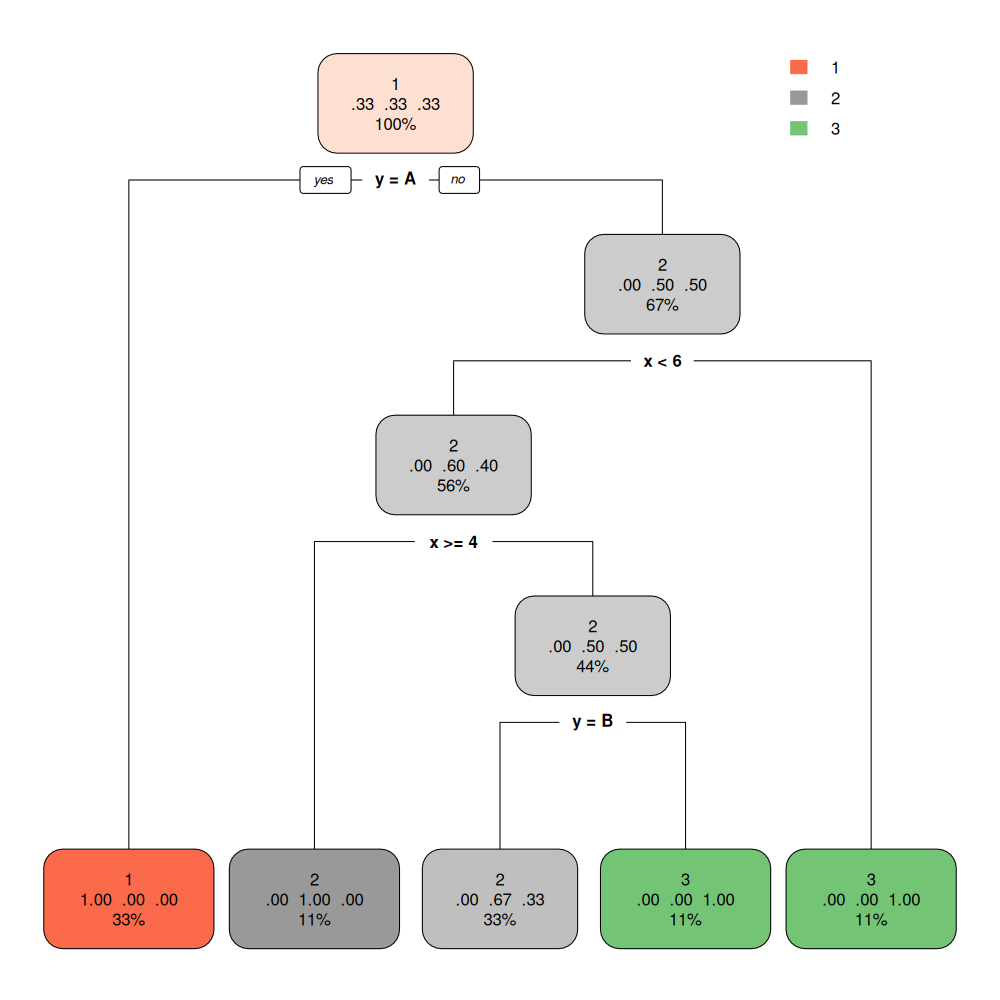

In [25]:
library(rpart) ; library(rpart.plot)
df = data.frame(x=c(1,2,1,3,4,3,7,1,6), y=c("A","A","B","B","C","C","C","B","A"), z=c(1,1,2,2,2,3,3,3,1))
r = rpart(z ~ ., data=df, method="class", control=list(minsplit = 2, minbucket = 1, cp = 0))
rpart.plot(r)

Pour une obscure raison rpart ne divise pas le noeud à 3 lignes correspondant à notre dernière étape ci-dessus. Je ne sais pas pourquoi mais chercherai...